University of Tuebingen \
DataLiteracy course -  Group Project 2023/2024 \
Authors: Johannes Bertram, Felix Böhm, Nadja Buttke, Fabian Morelli 

# Project Figures for Visualizing mean delays

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tueplots import bundles
from tueplots.constants.color import rgb

## Import data

In [2]:
df_dict = {}
folder_path = '../dat/delay'
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):
        file_path = os.path.join(folder_path, filename)
        

        key = filename.split('_')[1].replace(".json", "")

        key = key.replace('ä', 'ae').replace('ö', 'oe').replace('ü', 'ue')

        df = pd.read_json(file_path, orient='index')
        df.index = df.index.str.replace('ä', 'ae').str.replace('ö', 'oe').str.replace('ü', 'ue')
        print(key)
        df_dict[key] = df

print(df_dict['Berlin Hbf'])

Schwerin Hbf
Stuttgart Hbf
Mainz Hbf
Wiesbaden Hbf
Berlin Hbf
Erfurt Hbf
Leipzig Hbf
Dortmund Hbf
Dresden Hbf
Nuernberg Hbf
Potsdam Hbf
Saarbruecken Hbf
Essen Hbf
Bremen Hbf
Duisburg Hbf
Duesseldorf Hbf
Kiel Hbf
Magdeburg Hbf
Koeln Hbf
Hannover Hbf
Karlsruhe Hbf
Hamburg Hbf
Muenchen Hbf
                                                        switch time  \
Kiel Hbf          [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, ...   
Mainz Hbf         [50.0, 50.0, 50.0, 50.0, 46.0, 46.0, 50.0, 50....   
Muenchen Hbf      [1.0, 1.0, 28.0, 1.0, 1.0, 28.0, 1.0, 1.0, 28....   
Hannover Hbf      [59.0, 22.0, 59.0, 22.0, 22.0, 59.0, 59.0, 22....   
Duisburg Hbf      [46.0, 13.0, 46.0, 13.0, 17.0, 17.0, 46.0, 13....   
Saarbruecken Hbf  [30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 48.0, 48....   
Stuttgart Hbf     [28.0, 28.0, 28.0, 54.0, 54.0, 28.0, 28.0, 28....   
Karlsruhe Hbf     [58.0, 58.0, 58.0, 58.0, 50.0, 50.0, 58.0, 58....   
Koeln Hbf         [34.0, 34.0, 46.0, 46.0, 46.0, 46.0, 46.0, 54....   
Nu

In [3]:
cities = list(df_dict.keys())
cities.sort()
cities

['Berlin Hbf',
 'Bremen Hbf',
 'Dortmund Hbf',
 'Dresden Hbf',
 'Duesseldorf Hbf',
 'Duisburg Hbf',
 'Erfurt Hbf',
 'Essen Hbf',
 'Hamburg Hbf',
 'Hannover Hbf',
 'Karlsruhe Hbf',
 'Kiel Hbf',
 'Koeln Hbf',
 'Leipzig Hbf',
 'Magdeburg Hbf',
 'Mainz Hbf',
 'Muenchen Hbf',
 'Nuernberg Hbf',
 'Potsdam Hbf',
 'Saarbruecken Hbf',
 'Schwerin Hbf',
 'Stuttgart Hbf',
 'Wiesbaden Hbf']

In [4]:
len(cities)

23

In [5]:
df_dict['Hamburg Hbf']

,switch time,date,delay,reachable
Leipzig Hbf,"[21.0, 21.0, 21.0, 21.0, 47.0, 14.0, 14.0, 14....","[2023-06-12 09:10:00, 2023-10-09 09:10:00, 202...","[0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 2, 0, 32, 1...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, ..."
Mainz Hbf,"[58.0, 1.0, 58.0, 5.0, 5.0, 1.0, 5.0, 5.0, 5.0...","[2023-10-03 14:18:00, 2023-04-02 22:18:00, 202...","[18, 61, 7, 60.0, 60.0, 13, 0, 0, 0, 1, 60.0, ...","[3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, ..."
Muenchen Hbf,"[26.0, 26.0, 54.0, 20.0, 54.0, 20.0, 54.0, 20....","[2023-04-11 09:28:00, 2023-04-17 09:28:00, 202...","[0, 4, 0, 2, 0, 0, 0, 3, 0, 0, 0, 11, 0, 28, 4...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
Duisburg Hbf,"[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, ...","[2023-02-06 07:51:00, 2023-04-17 07:51:00, 202...","[92.0, 2, 0, 131.0, 0, 2, 110.0, 688.0, 244.0,...","[2, 3, 3, 2, 3, 3, 2, 1, 2, 3, 2, 2, 2, 2, 3, ..."
Saarbruecken Hbf,"[11.0, 19.0, 19.0, 19.0, 14.0, 14.0, 19.0, 19....","[2023-02-06 07:59:00, 2023-04-11 07:59:00, 202...","[180, 0, 0, 0, 0, 0, 0, 0, 0, 180, 0, 0, 0, 18...","[2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, ..."
Stuttgart Hbf,"[11.0, 22.0, 17.0, 26.0, 17.0, 26.0, 17.0, 26....","[2023-04-02 23:37:00, 2023-10-04 14:38:00, 202...","[1, 31, 74.0, 0, 0, 0, 0, 0, 0, 10, 0, 75.0, 1...","[3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, ..."
Karlsruhe Hbf,"[22.0, 22.0, 22.0, 22.0, 21.0, 22.0, 22.0, 22....","[2023-04-02 23:09:00, 2023-04-03 23:09:00, 202...","[1, 7, 7, 4, 180, 3, 3, 2, 2, 2, 0, 3, 14, 2, ...","[3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
Koeln Hbf,"[58.0, 43.0, 3.0, 5.0, 51.0, 51.0, 3.0, 5.0, 5...","[2023-10-03 16:05:00, 2023-02-06 07:33:00, 202...","[33, 0, 29.0, 61.0, 4, 4, 32.0, 1, 6, 6, 0, 3,...","[3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, ..."
Berlin Hbf,"[21.0, 16.0, 21.0, 16.0, 14.0, 14.0, 14.0, 14....","[2023-04-11 10:32:00, 2023-04-11 11:26:00, 202...","[0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 27, 122.0...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, ..."
Magdeburg Hbf,"[14.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0,...","[2023-02-02 17:00:00, 2023-04-01 19:44:00, 202...","[21, 5, 5, 2, 1, 3, 3, 1, 0, 3, 2, 3, 3, 180, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, ..."


## Mean Delay for each switch time 

In [6]:
switch_times_array = list(range(1,61,1))
empty = pd.DataFrame(columns=['switch_times', 'mean_delay', 'reachable1', 'reachable2', 'reachable3'])
empty.switch_times = switch_times_array
empty['mean_delay'] = [[] for _ in range(60)]
empty.loc[:, ['reachable1', 'reachable2', 'reachable3']] = 0


#for column in ['mean_delay', 'reachable1', 'reachable2', 'reachable3']: # fill cells with empty lists such that later can fill with numbers
#    empty[column] = [np.array([]) for _ in range(60)]
#display(empty.head(2))

# -------------------

delay_matrix = [[] for _ in range(60)]

# data processing
for key, df in df_dict.items():
    
    #display(df.head(2))
    for irow, row in df.iterrows():
        
        #print(row)

        for i, minute in enumerate(row['switch time']):
            
    
            delay = row['delay'][i]
            #print(empty.loc[minute-1, 'mean_delay'])
            #print(type(empty.loc[minute-1, 'mean_delay']))


            #empty.loc[minute-1, 'mean_delay'].append(delay)
            delay_matrix[int(minute-1)].append(delay)

            #print(empty.loc[minute-1, 'mean_delay'])
            

            # Fill the reachable columns
            case = row['reachable'][i]
            if case == 1:
                empty.loc[minute-1, 'reachable1'] += 1
            elif case == 2:
                empty.loc[minute-1, 'reachable2'] += 1
            elif case == 3:
                empty.loc[minute-1, 'reachable3'] += 1
            
            #display(empty)
            #break
   
        #break

means = []
medians = []
for minute in delay_matrix:
    means.append(np.mean(minute).round(2))
    medians.append(np.median(minute).round(2))

#print(means)
empty['mean_delay'] = means
empty['median_delay'] = medians
df_mean_delays = empty

In [7]:
df_mean_delays.head(2)

,switch_times,mean_delay,reachable1,reachable2,reachable3,median_delay
0,1,62.08,4902,50001,37880,56.0
1,2,52.69,7445,75357,78938,40.0


### Plot

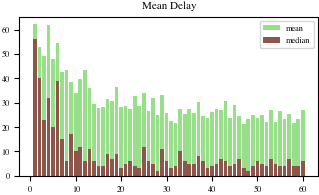

In [8]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))
plt.rcParams.update()
x = np.arange(len(df_mean_delays.switch_times))

fig, ax = plt.subplots()
ax.bar(x+1, df_mean_delays.mean_delay, label="mean", color='#98DF8A')
ax.bar(x+1, df_mean_delays.median_delay, label="median", color='#8C564B')

plt.legend()
plt.title('Mean Delay')

plt.show()

12


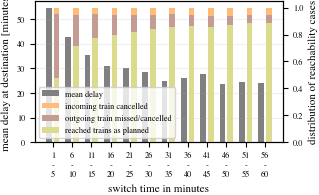

In [9]:
plt.rcParams.update(bundles.icml2022(column="half", nrows=1, ncols=1, usetex=False))

# Generate grouped Data

group_size = 5  # set group size 

grouped_mean_delays = []
#grouped_median_delays = []
grouped_reachable1 = []
grouped_reachable2 = []
grouped_reachable3 = []

for i in range(0, len(df_mean_delays.switch_times), group_size):
    group_sum_mean_delays = np.sum(df_mean_delays.mean_delay[i:i+group_size])
    grouped_mean_delays.append(group_sum_mean_delays)

    #group_sum_median_delays = np.sum(df_mean_delays.median_delay[i:i+group_size])
    #grouped_median_delays.append(group_sum_mean_delays)

    group_sum_reachable1 = np.sum(df_mean_delays.reachable1[i:i+group_size])
    grouped_reachable1.append(group_sum_reachable1)

    group_sum_reachable2 = np.sum(df_mean_delays.reachable2[i:i+group_size])
    grouped_reachable2.append(group_sum_reachable2)

    group_sum_reachable3 = np.sum(df_mean_delays.reachable3[i:i+group_size])
    grouped_reachable3.append(group_sum_reachable3)



print(len(grouped_mean_delays))
x = np.arange(len(grouped_mean_delays))

y_ticks_array = np.arange(0, max(grouped_mean_delays)/group_size+1, 10)



# FIGURE ------------------------------

fig, ax1 = plt.subplots()

width = 0.3
ax1.bar(x+1-0.2, np.array(grouped_mean_delays)/group_size, width, color="grey", label="mean delay")
#ax1.bar(x+1-0.2, np.array(grouped_median_delays)/group_size, width, color='black', alpha=0.2, label="median delay")

#ax1.set_title('Mean Delay in Minutes and distribution of reachability cases \n depending on the switch time in minutes in Frankfurt Hbf \nusing subset data')
ax1.set_xlabel('switch time in minutes')
ax1.set_ylabel('mean delay at destination [minutes]')
xticks_array =  [f'{start}\n-\n{end}' for start, end in zip(range(1, 60, group_size), range(1 + group_size - 1, 60 + 1, group_size))]
ax1.set_xticks(x+1, xticks_array)
ax1.set_yticks(y_ticks_array)
ax1.yaxis.grid("major", alpha=0.2)



ax2 = ax1.twinx()

bottom = np.zeros(len(grouped_mean_delays))

reachables_total = np.array(grouped_reachable1) + np.array(grouped_reachable2) + np.array(grouped_reachable3)
bar1 = np.array(grouped_reachable1)/reachables_total
bar2 = np.array(grouped_reachable2)/reachables_total
bar3 = np.array(grouped_reachable3)/reachables_total

ax2.bar(x+1+0.2, bar1, width, color="#FFBB78", label="incoming train cancelled", bottom=bottom+bar2+bar3)
ax2.bar(x+1+0.2, bar2, width, color="#C49C94", label="outgoing train missed/cancelled", bottom=bottom+bar3)
ax2.bar(x+1+0.2, bar3, width, color="#DBDB8D", label="reached trains as planned", bottom=bottom)

#ax2.set_yscale()
ax2.set_ylabel('distribution of reachability cases')


# Solution for having two legends
bars1, labels1 = ax1.get_legend_handles_labels()
bars2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(bars1 + bars2, labels1 + labels2, loc="lower left")

plt.savefig("plot_meanDelay_reachability_switchTime.pdf", format="pdf")

plt.show()

